https://towardsdatascience.com/data-driven-growth-with-python-part-3-customer-lifetime-value-prediction-6017802f2e0f
https://www.datacamp.com/tutorial/customer-life-time-value

Lifetime Value: Total Gross Revenue - Total Cost

This equation now gives us the historical lifetime value. If we see some customers having very high negative lifetime value historically, it could be too late to take an action. At this point, we need to predict the future with machine learning:

Lifetime Value Prediction
We will continue using our online retail dataset for this example as well. Let’s identify our path to glory:

Define an appropriate time frame for Customer Lifetime Value calculation
Identify the features we are going to use to predict future and create them
Calculate lifetime value (LTV) for training the machine learning model
Build and run the machine learning model
Check if the model is useful
Deciding the time frame really depends on your industry, business model, strategy and more. For some industries, 1 year is a very long period while for the others it is very short. In our example, we will go ahead with 6 months.

RFM scores for each customer ID (which we calculated in the previous article) are the perfect candidates for feature set. To implement it correctly, we need to split our dataset. We will take 3 months of data, calculate RFM and use it for predicting next 6 months. So we need to create two dataframes first and append RFM scores to them.

CLTV Implementation in Python (Using Formula)

4) Using the following equation: CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

Customer Value = Average Order Value * Purchase Frequency
Average Order Value = Total Revenue / Total Number of Orders
Purchase Frequency =  Total Number of Orders / Total Number of Customers
Customer Lifetime=1/Churn Rate
Churn Rate= 1-Repeat Rate


In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np


In [3]:
data=pd.read_csv('OnlineRetail.csv',encoding = "ISO-8859-1")


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()


<AxesSubplot:>

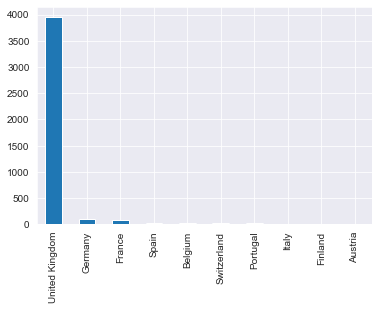

In [6]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')


In [7]:
uk_data=data[data.Country=='United Kingdom']
uk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB


In [8]:
uk_data.describe()


,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    486286 non-null  object 
 1   StockCode    486286 non-null  object 
 2   Description  485694 non-null  object 
 3   Quantity     486286 non-null  int64  
 4   InvoiceDate  486286 non-null  object 
 5   UnitPrice    486286 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      486286 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.4+ MB


In [10]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]


In [11]:
#Calulate total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']


Here, you are going to perform the following operations:

Calculate the number of days between the present date and the date of last purchase from each customer.
Calculate the number of orders for each customer.
Calculate sum of purchase price for each customer.

In [18]:
uk_data_group=uk_data.groupby('CustomerID').agg({
                                                 'InvoiceNo': lambda num: len(num),
                                                 'Quantity': lambda quant: quant.sum(),
                                                 'TotalPurchase': lambda price: price.sum(),
                                                  'InvoiceDate': lambda date: (date.max()-date.min()).days})


In [17]:
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [19]:
uk_data_group.head()


,InvoiceNo,Quantity,TotalPurchase,InvoiceDate
CustomerID,,,,
12346.0,1,74215,77183.60,0
12747.0,103,1275,4196.01,366
12748.0,4596,25748,33719.73,372
12749.0,199,1471,4090.88,209
12820.0,59,722,942.34,323


In [21]:
# Change the name of columns
uk_data_group.columns=['num_transactions','num_units','spent_money','num_days']
uk_data_group.head()


,num_transactions,num_units,spent_money,num_days
CustomerID,,,,
12346.0,1,74215,77183.60,0
12747.0,103,1275,4196.01,366
12748.0,4596,25748,33719.73,372
12749.0,199,1471,4090.88,209
12820.0,59,722,942.34,323


1. Calculate Average Order Value

In [22]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']


In [23]:
uk_data_group.head()


,num_transactions,num_units,spent_money,num_days,avg_order_value
CustomerID,,,,,
12346.0,1,74215,77183.60,0,77183.600000
12747.0,103,1275,4196.01,366,40.737961
12748.0,4596,25748,33719.73,372,7.336756
12749.0,199,1471,4090.88,209,20.557186
12820.0,59,722,942.34,323,15.971864


2. Calculate Purchase Frequency

In [24]:
purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]


In [29]:
purchase_frequency

90.37107880642694

3. Calculate Repeat Rate and Churn Rate

In [27]:
# Repeat Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]


In [28]:
repeat_rate

0.9818923743942872

In [30]:
#Churn Rate
churn_rate=1-repeat_rate


In [31]:
churn_rate

0.018107625605712774

In [32]:
purchase_frequency,repeat_rate,churn_rate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

4. Calculate Profit Margin
Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.

In [33]:
# Profit Margin
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05


In [34]:
uk_data_group.head()


,num_transactions,num_units,spent_money,num_days,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,1,74215,77183.60,0,77183.600000,3859.1800
12747.0,103,1275,4196.01,366,40.737961,209.8005
12748.0,4596,25748,33719.73,372,7.336756,1685.9865
12749.0,199,1471,4090.88,209,20.557186,204.5440
12820.0,59,722,942.34,323,15.971864,47.1170


5. Calcualte Customer Lifetime Value

In [35]:
# Customer Value
uk_data_group['CLV']=(uk_data_group['avg_order_value']*purchase_frequency)/churn_rate


In [36]:
#Customer Lifetime Value
uk_data_group['cust_lifetime_value']=uk_data_group['CLV']*uk_data_group['profit_margin']


In [37]:
uk_data_group.head()


,num_transactions,num_units,spent_money,num_days,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,1,74215,77183.60,0,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,103,1275,4196.01,366,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,4596,25748,33719.73,372,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,199,1471,4090.88,209,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,59,722,942.34,323,15.971864,47.1170,7.971198e+04,3.755789e+06


Prediction Model for CLTV

Let's build the CLTV prediction model.

Here, you are going to predict CLTV using Linear Regression Model.

Let's first use the data loaded and filtered above.

In [38]:
uk_data.head()


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [39]:
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))


In [40]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


In [41]:
sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()


In [42]:
sale.head()


month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77


In [43]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)


In [44]:
sale.head()


month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84,32619.36
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


In [45]:
X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=sale[['CLV']]


Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state as a seed value to maintain reproducibility, which means whenever you split the data will not affect the results. Also, if random_state is None, then random number generator uses np.random for selecting records randomly. It means If you don't set a seed, it is different each time.

#split training set and test set

In [51]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)


Model Development
First, import the Linear Regression module and create a Linear Regression object. Then, fit your model on the train set using fit() function and perform prediction on the test set using predict() function.

In [52]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)


In [53]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)


[208.50969617]
[[0.99880551 0.80381254 1.60226829 1.67433228 1.52860813 2.87959449]]


How Well Does the Model Fit the data?
In order to evaluate the overall fit of the linear model, we use the R-squared value. R-squared is the proportion of variance explained by the model. Value of R-squared lies between 0 and 1. Higher value or R-squared is considered better because it indicates the larger variance explained by the model.

In [54]:
    from sklearn import metrics
# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.9666074402817512


This model has a higher R-squared (0.96). This model provides a better fit to the data.

Model Evaluation
For regression problems following evaluation metrics used (Ritchie Ng):

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
Mean Squared Error (MSE) is the mean of the squared errors.
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [55]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 595.0282284701226
MSE 2114139.889867895
RMSE: 1454.0082151995891


RMSE is more popular than MSE and MAE because RMSE is interpretable with y because of the same units.

Pros and Cons of CLTV

CLTV helps you to design an effective business plan and also provide a chance to scale your business. CLTV draw meaningful customer segments these segment can help you to identify needs of the different-different segment.

Customer Lifetime Value is a tool, not a strategy. CLTV can figure out most profitable customers, but how you are going to make a profit from them, it depends on your strategy. Generally, CLTV models are confused and misused. Obsession with CLTV may create blinders. Companies only focus on finding the best customer group and focusing on them and repeat the business, but it’s also important to give attention to other customers.

Conclusion
Congratulations, you have made it to the end of this tutorial!

In this tutorial, you have covered a lot of details about Customer Lifetime Value. You have learned what customer lifetime value is, approaches for calculating CLTV, implementation of CLTV from scratch in python, a prediction model for CLTV, and Pros and Cons of CLTV. Also, you covered some basic concepts of pandas such as groupby and pivot table for summarizing selected columns and rows of data.

Hopefully, you can now utilize CLTV concept to analyze your own datasets. Thanks for reading this tutorial!